### Crime dataset

In [2]:
! pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     ---- -------------------------------- 30.7/282.6 kB 131.3 kB/s eta 0:00:02
     ----- ------------------------------- 41.0/282.6 kB 140.9 kB/s eta 0:00:02
     ----- ------------------------------- 41.0/282.6 kB 140.9 kB/s eta 0:00:02
     ------------ ------------------------ 92.2/282.6 kB 262.6 kB/s eta 0:00:01
     --------------- -------------------- 122.9/282.6 kB 313.8 kB/s eta 0:00:01
     ------------------------------- ---- 245.8/282.6 kB 580.1 kB/s eta 0:00:01
     ------------------------------------ 282.6/282.6 kB 623.3 kB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples

import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv(r"C:\Users\sayye\Downloads\crime_data.csv")

In [5]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [8]:
data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [10]:
crime_data=data.rename({'Unnamed: 0':'State'},axis=1)
crime_data

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [12]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


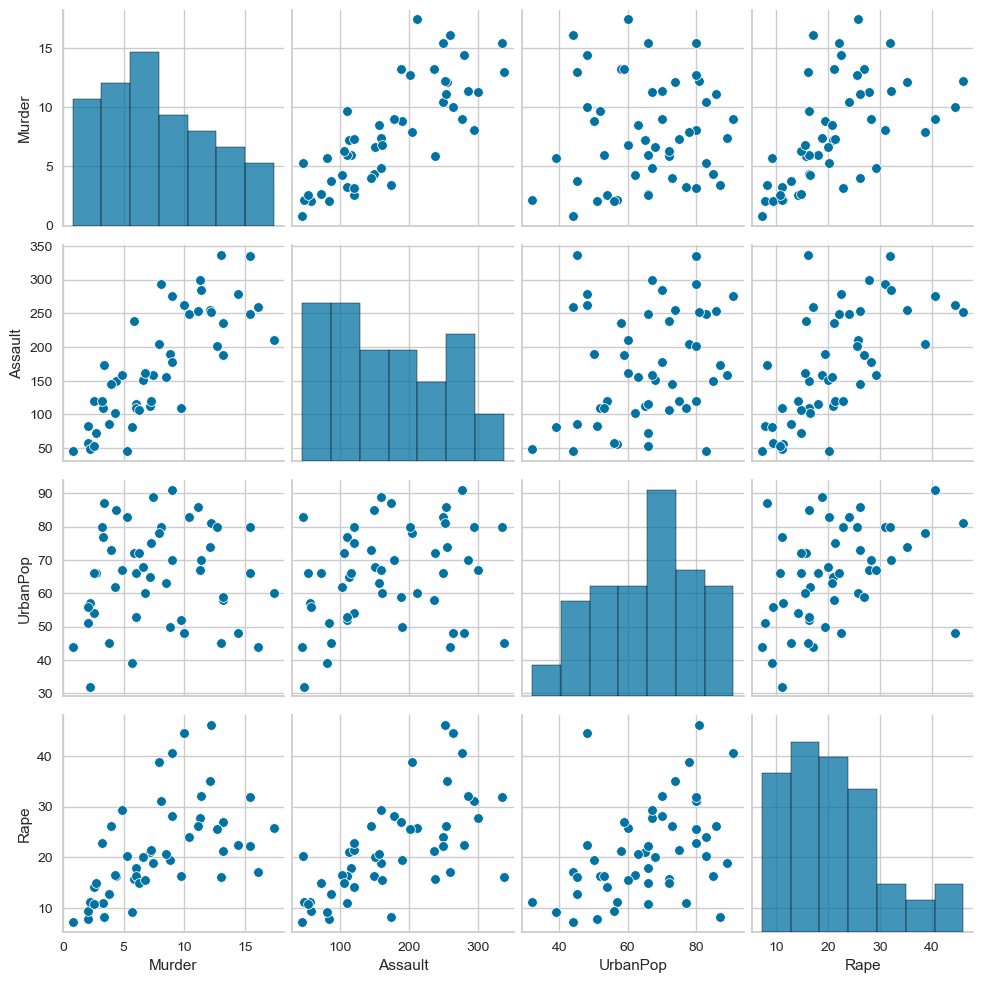

In [24]:
sns.pairplot(crime_data)
plt.show()

### Outlier detection

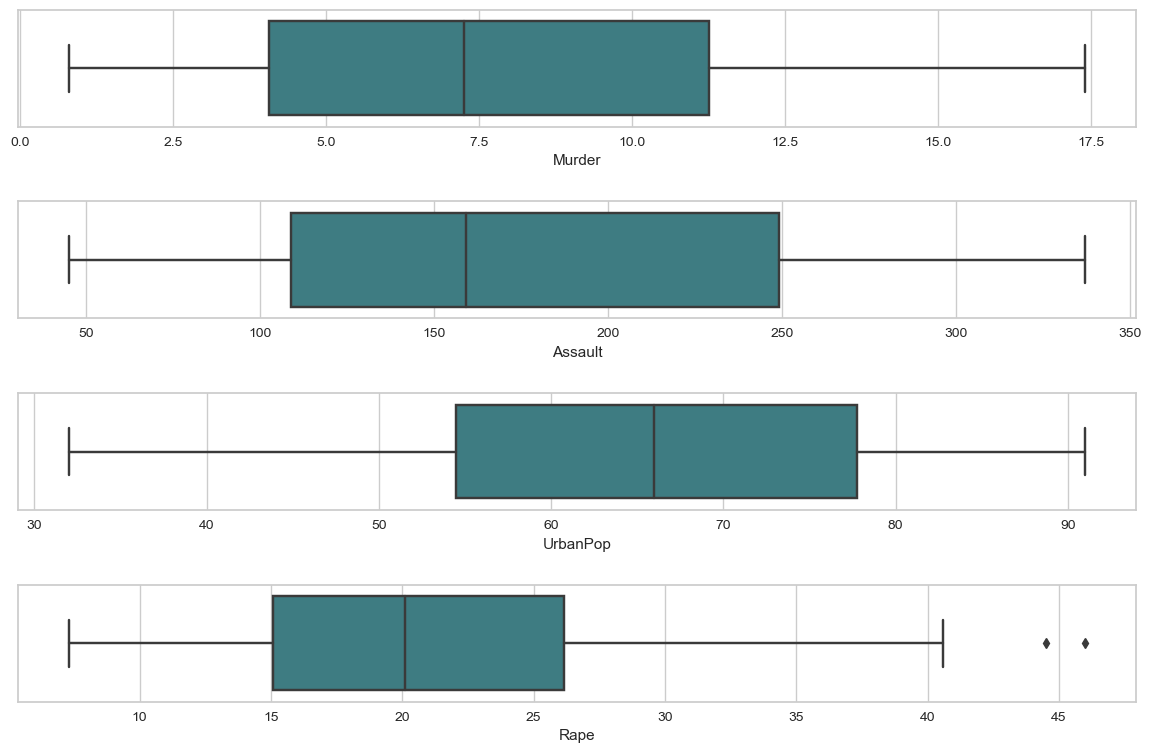

In [25]:
outlier = crime_data.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data=outlier,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [16]:
crime_df = crime_data.set_index('State')
crime_df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


### Normalizing the Data

In [17]:
minmax = MinMaxScaler()
norm_crime = minmax.fit_transform(crime_df)
norm_crime.shape

(50, 4)

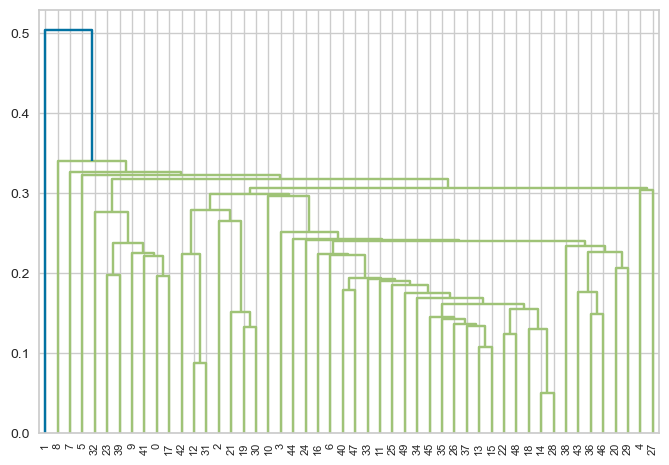

In [20]:
Dendrogram = sch.dendrogram(sch.linkage(norm_crime,method='single'))

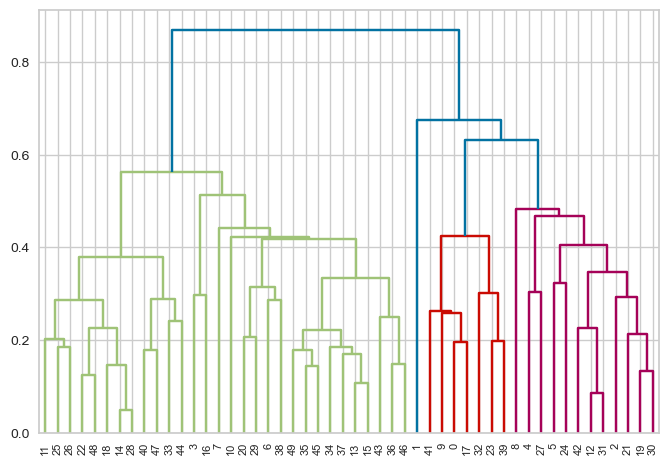

In [21]:
Dendrogram= sch.dendrogram(sch.linkage(norm_crime,method='average'))

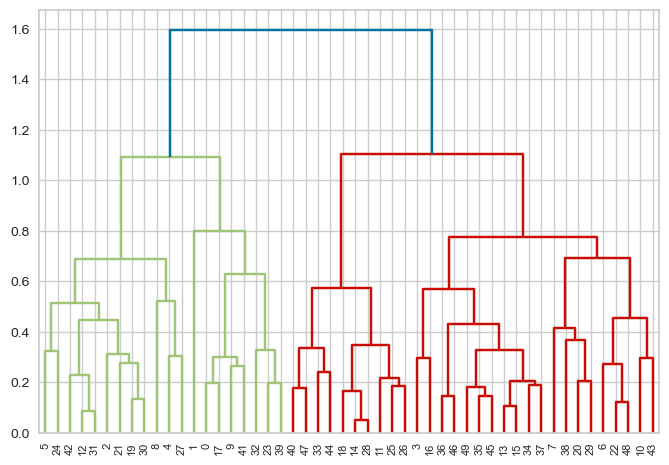

In [22]:
Dendrogram = sch.dendrogram(sch.linkage(norm_crime,method='complete'))

In [26]:
h_clusters = AgglomerativeClustering(n_clusters=4,linkage='complete')

In [27]:
hcs = h_clusters.fit_predict(norm_crime)         ## Predicting clusters id for each record
h_clust_id = pd.DataFrame(hcs, columns=['h_clust_id'])
h_clust_id.head()

,h_clust_id
0,0
1,0
2,3
3,1
4,3


In [29]:
mcrime_data = crime_data.copy(deep=True)
mcrime_data = pd.concat([h_clust_id,mcrime_data],axis=1)       ## creating clusterid column in dataframe
mcrime_data

,h_clust_id,State,Murder,Assault,UrbanPop,Rape
0,0,Alabama,13.2,236,58,21.2
1,0,Alaska,10.0,263,48,44.5
2,3,Arizona,8.1,294,80,31.0
3,1,Arkansas,8.8,190,50,19.5
4,3,California,9.0,276,91,40.6
5,3,Colorado,7.9,204,78,38.7
6,1,Connecticut,3.3,110,77,11.1
7,1,Delaware,5.9,238,72,15.8
8,3,Florida,15.4,335,80,31.9
9,0,Georgia,17.4,211,60,25.8


In [31]:
# Group and sort on cluster
mcrime_df = mcrime_data.set_index('State')
mcrime_df.head()

,h_clust_id,Murder,Assault,UrbanPop,Rape
State,,,,,
Alabama,0,13.2,236,58,21.2
Alaska,0,10.0,263,48,44.5
Arizona,3,8.1,294,80,31.0
Arkansas,1,8.8,190,50,19.5
California,3,9.0,276,91,40.6


In [32]:
mcrime_df.groupby(mcrime_df['h_clust_id']).mean().sort_values(by='Murder') 

,Murder,Assault,UrbanPop,Rape
h_clust_id,,,,
2,3.180000,78.700000,49.300000,11.6300
1,5.715000,132.300000,70.800000,18.1000
3,10.883333,256.916667,78.333333,32.2500
0,14.087500,252.750000,53.500000,24.5375


In [33]:
mcrime_df.groupby(['h_clust_id']).median().sort_values(by='Murder')  

,Murder,Assault,UrbanPop,Rape
h_clust_id,,,,
2,2.40,82.0,52.0,11.25
1,5.95,132.5,70.0,18.40
3,11.20,254.5,80.0,31.45
0,13.80,254.0,53.0,22.35


In [34]:
#Cluster 2 has the loweest crime rate among all the clusters, also this is the lowest urban population

#Crime rate has direct releationship with urbanPopulation. However cluster 0 has highest crime rate
#in all categories dispite having the low urban population*
#All types of Crimes show a positive correlation.

###  Standardizing the Data

In [18]:
standard_scaler = StandardScaler()
std_crime = standard_scaler.fit_transform(crime_df)
std_crime.shape

(50, 4)

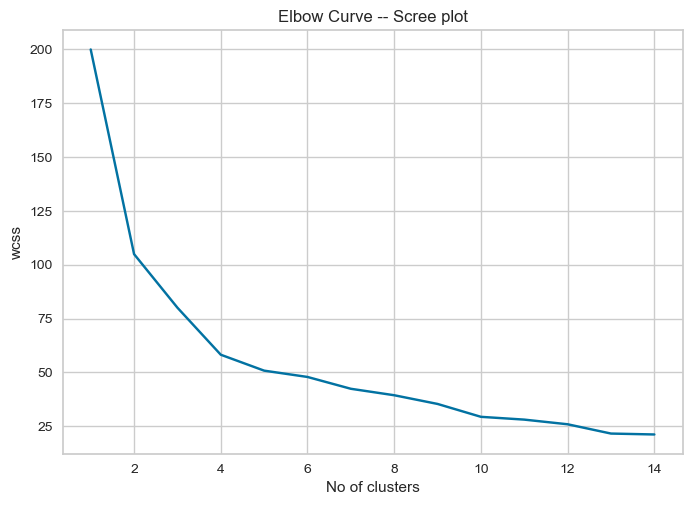

In [35]:
wcss = []                                  

for i in range(1,15):
    k = KMeans(n_clusters=i,random_state=0) 
    k.fit(std_crime)
    wcss.append(k.inertia_)
plt.plot(range(1,15),wcss)
plt.title('Elbow Curve -- Scree plot')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [36]:
### initiation KMean class and fiting it on the data

k_clust = KMeans(n_clusters=4, random_state=0)  
k_clust.fit(std_crime)

KMeans(n_clusters=4, random_state=0)

In [37]:
km_clust = pd.DataFrame(k_clust.labels_,columns=['k_clust_id']) 
km_clust.head()

,k_clust_id
0,3
1,3
2,0
3,3
4,0


In [39]:
mcrime_data= pd.concat([km_clust,mcrime_data],axis=1)
mcrime_data.sort_values(by='k_clust_id')

,k_clust_id,h_clust_id,State,Murder,Assault,UrbanPop,Rape
21,0,3,Michigan,12.1,255,74,35.1
27,0,3,Nevada,12.2,252,81,46.0
2,0,3,Arizona,8.1,294,80,31.0
4,0,3,California,9.0,276,91,40.6
5,0,3,Colorado,7.9,204,78,38.7
30,0,3,New Mexico,11.4,285,70,32.1
42,0,3,Texas,12.7,201,80,25.5
8,0,3,Florida,15.4,335,80,31.9
31,0,3,New York,11.1,254,86,26.1
19,0,3,Maryland,11.3,300,67,27.8


In [41]:
mcrime_df = mcrime_data.set_index('State')
mcrime_df.head()

,k_clust_id,h_clust_id,Murder,Assault,UrbanPop,Rape
State,,,,,,
Alabama,3,0,13.2,236,58,21.2
Alaska,3,0,10.0,263,48,44.5
Arizona,0,3,8.1,294,80,31.0
Arkansas,3,1,8.8,190,50,19.5
California,0,3,9.0,276,91,40.6


In [42]:
mcrime_df.groupby('k_clust_id').mean().sort_values(by='Murder')

,h_clust_id,Murder,Assault,UrbanPop,Rape
k_clust_id,,,,,
2,1.769231,3.600000,78.538462,52.076923,12.176923
1,1.117647,5.852941,141.176471,73.647059,19.335294
0,3.000000,11.054545,264.090909,79.090909,32.618182
3,0.111111,13.500000,245.777778,53.111111,23.977778


In [43]:
mcrime_df.groupby('k_clust_id').median().sort_values(by='Murder')

,h_clust_id,Murder,Assault,UrbanPop,Rape
k_clust_id,,,,,
2,2.0,2.6,81.0,53.0,11.3
1,1.0,6.0,149.0,72.0,20.0
0,3.0,11.3,255.0,80.0,31.9
3,0.0,13.2,249.0,50.0,22.2


In [44]:
#kClustId - 3 or hi_Clust_Id 2 has the loweest crime rate among all the clusters, also this is the lowest urban population

#Crime rate has direct releationship with urbanPopulation. However, kClustId 1 / hi_Clust_id 0 has highest
 #crime rate in all categories dispite having the low urban population

#All types of Crimes show a positive correlation menaing one high means other high

###  DBSCAN - (Density Based Spatial Clustering of Applications with Noise)
### DBSCAN of Standard Scaled Data

In [45]:
crime_data.columns

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [46]:
crime_data.drop('State',axis=1,inplace=True)

In [47]:
array = crime_data.values

In [48]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [49]:
scaler = StandardScaler().fit(array)            
x = scaler.transform(array)                     
x 

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [50]:
scaler1 = StandardScaler()                       
y = scaler1.fit_transform(array)
y

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [56]:
db = DBSCAN(eps=1.2,min_samples=6)      
db.fit(x)                             
print(db.labels_)      

[-1 -1 -1  0 -1 -1  0  0 -1 -1  0  0 -1  0  0  0  0 -1  0 -1  0 -1  0 -1
  0  0  0 -1  0  0 -1 -1 -1  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0
  0  0]


In [66]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(std_crime, db.labels_))

Silhouette Coefficient: 0.386


In [57]:
db.get_params()

{'algorithm': 'auto',
 'eps': 1.2,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 6,
 'n_jobs': None,
 'p': None}

In [58]:
d_clust = pd.DataFrame(db.labels_,columns=['d_clust_id'])     
d_clust.head()

,d_clust_id
0,-1
1,-1
2,-1
3,0
4,-1


In [59]:
mcrime_data = pd.concat([d_clust,mcrime_data],axis=1)       
mcrime_data

,d_clust_id,k_clust_id,h_clust_id,State,Murder,Assault,UrbanPop,Rape
0,-1,3,0,Alabama,13.2,236,58,21.2
1,-1,3,0,Alaska,10.0,263,48,44.5
2,-1,0,3,Arizona,8.1,294,80,31.0
3,0,3,1,Arkansas,8.8,190,50,19.5
4,-1,0,3,California,9.0,276,91,40.6
5,-1,0,3,Colorado,7.9,204,78,38.7
6,0,1,1,Connecticut,3.3,110,77,11.1
7,0,1,1,Delaware,5.9,238,72,15.8
8,-1,0,3,Florida,15.4,335,80,31.9
9,-1,3,0,Georgia,17.4,211,60,25.8


In [60]:
mcrime_data.sort_values(by='d_clust_id')

,d_clust_id,k_clust_id,h_clust_id,State,Murder,Assault,UrbanPop,Rape
0,-1,3,0,Alabama,13.2,236,58,21.2
32,-1,3,0,North Carolina,13.0,337,45,16.1
27,-1,0,3,Nevada,12.2,252,81,46.0
23,-1,3,0,Mississippi,16.1,259,44,17.1
21,-1,0,3,Michigan,12.1,255,74,35.1
19,-1,0,3,Maryland,11.3,300,67,27.8
17,-1,3,0,Louisiana,15.4,249,66,22.2
39,-1,3,0,South Carolina,14.4,279,48,22.5
31,-1,0,3,New York,11.1,254,86,26.1
41,-1,3,0,Tennessee,13.2,188,59,26.9


In [62]:
mcrime_df = mcrime_data.set_index('State')
mcrime_df.head()

,d_clust_id,k_clust_id,h_clust_id,Murder,Assault,UrbanPop,Rape
State,,,,,,,
Alabama,-1,3,0,13.2,236,58,21.2
Alaska,-1,3,0,10.0,263,48,44.5
Arizona,-1,0,3,8.1,294,80,31.0
Arkansas,0,3,1,8.8,190,50,19.5
California,-1,0,3,9.0,276,91,40.6


In [63]:
mcrime_df.groupby('d_clust_id').median().sort_values(by='Murder')

,k_clust_id,h_clust_id,Murder,Assault,UrbanPop,Rape
d_clust_id,,,,,,
0,1.0,1.0,5.10,114.0,66.0,16.30
-1,0.0,3.0,12.15,257.0,68.5,27.35


In [64]:
mcrime_df.groupby('k_clust_id').median().sort_values(by='Murder')

,d_clust_id,h_clust_id,Murder,Assault,UrbanPop,Rape
k_clust_id,,,,,,
2,0.0,2.0,2.6,81.0,53.0,11.3
1,0.0,1.0,6.0,149.0,72.0,20.0
0,-1.0,3.0,11.3,255.0,80.0,31.9
3,-1.0,0.0,13.2,249.0,50.0,22.2


In [65]:
mcrime_df.groupby('h_clust_id').median().sort_values(by='Murder')

,d_clust_id,k_clust_id,Murder,Assault,UrbanPop,Rape
h_clust_id,,,,,,
2,0.0,2.0,2.40,82.0,52.0,11.25
1,0.0,1.0,5.95,132.5,70.0,18.40
3,-1.0,0.0,11.20,254.5,80.0,31.45
0,-1.0,3.0,13.80,254.0,53.0,22.35


### Airlines dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples

import warnings
warnings.filterwarnings('ignore')

In [4]:
airline=pd.read_excel(r"C:\Users\sayye\Downloads\EastWestAirlines.xlsx",sheet_name='data')

In [5]:
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
airline.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
airline.set_index('ID',inplace=True)
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [8]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [9]:
airline.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [13]:
airline.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award                int64
dtype: object

In [14]:
airline.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


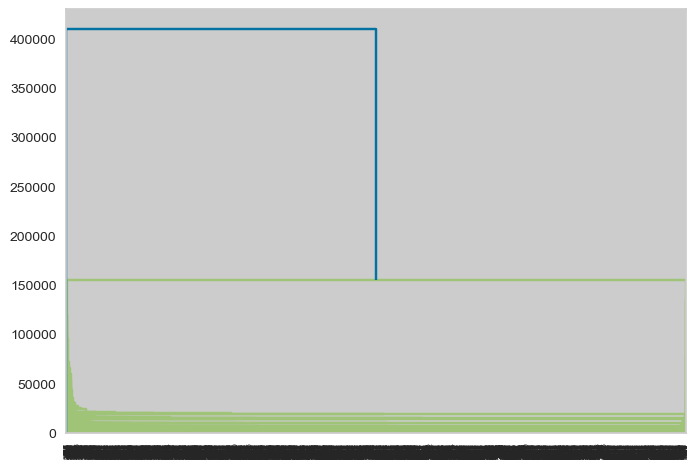

In [15]:
Dendrogram = sch.dendrogram(sch.linkage(airline,method='single'))

### Outliers Detection

In [19]:
airline.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

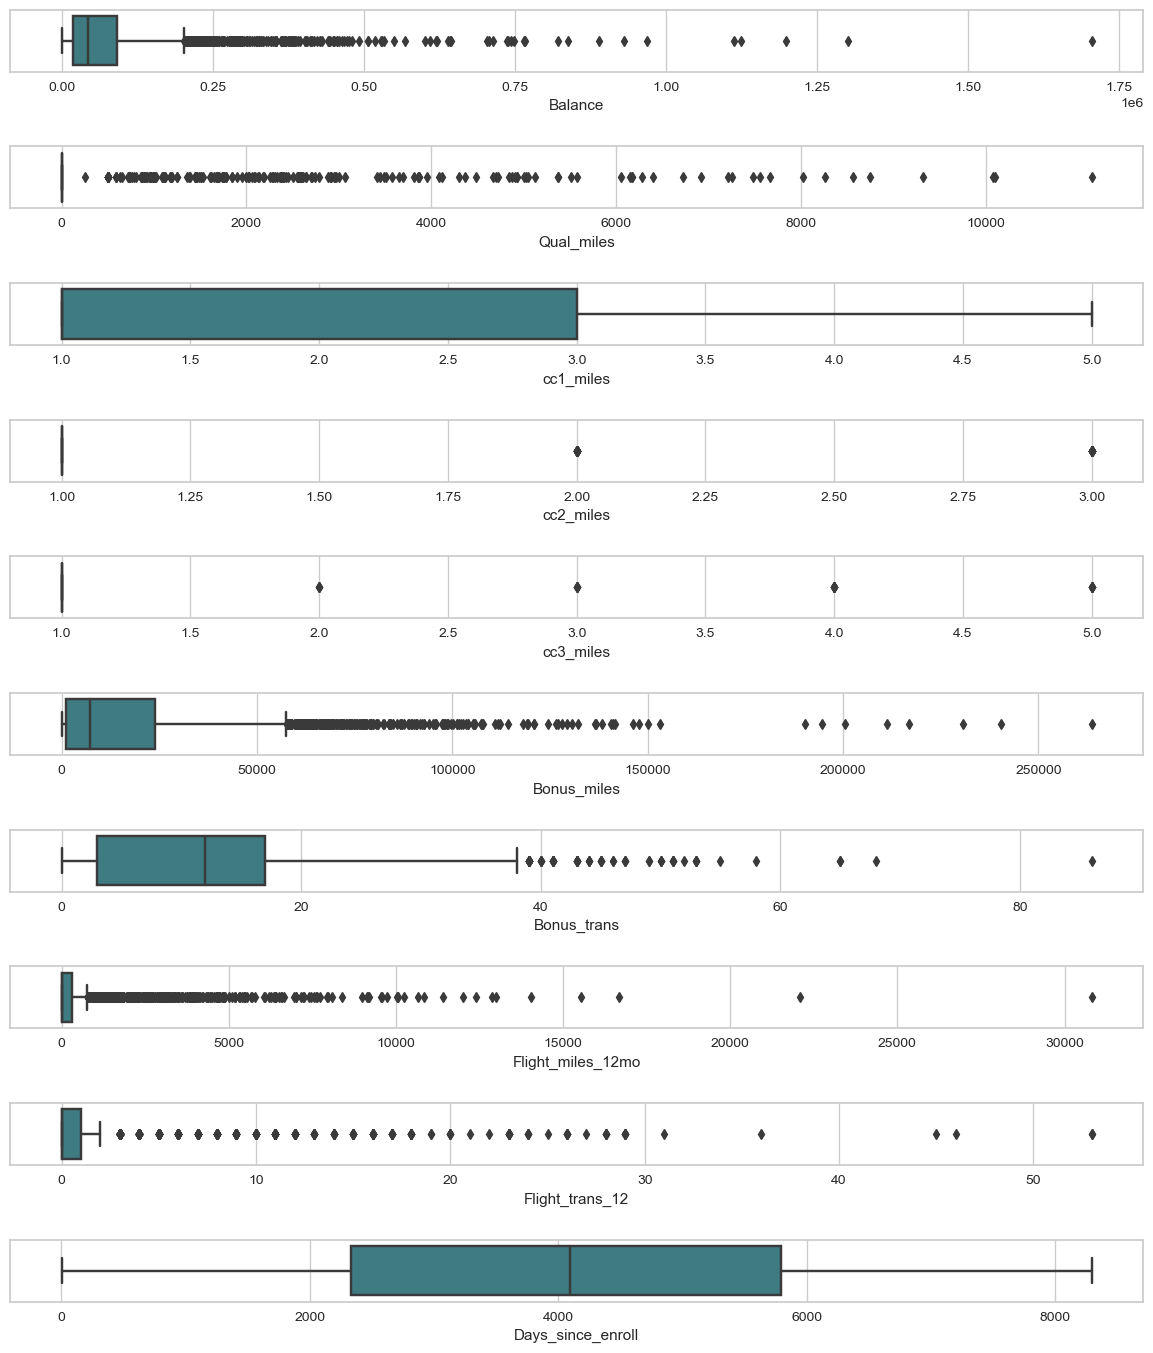

In [20]:
outlier = airline.copy() 
fig, axes=plt.subplots(10,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=outlier,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

###  DBSCAN - (Density Based Spatial Clustering of Applications with Noise)
### DBSCAN of Standard Scaled Data

In [21]:
#Standardizing the Data
standard_scaler = StandardScaler()
std_airline = standard_scaler.fit_transform(airline)
std_airline.shape

(3999, 11)

In [22]:
# Normalizing the data
minmax = MinMaxScaler()
norm_airline = minmax.fit_transform(airline)
norm_airline.shape

(3999, 11)

In [23]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_airline)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

,Num_Clusters,Cluster_Errors
0,1,43989.000000
1,2,35409.516630
2,3,30899.271222
3,4,28588.528926
4,5,23700.510453
5,6,21756.876248
6,7,18893.629987
7,8,17317.656436
8,9,16064.651732
9,10,14726.983323


In [25]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(norm_airline)
    wcss.append(kmeans.inertia_)

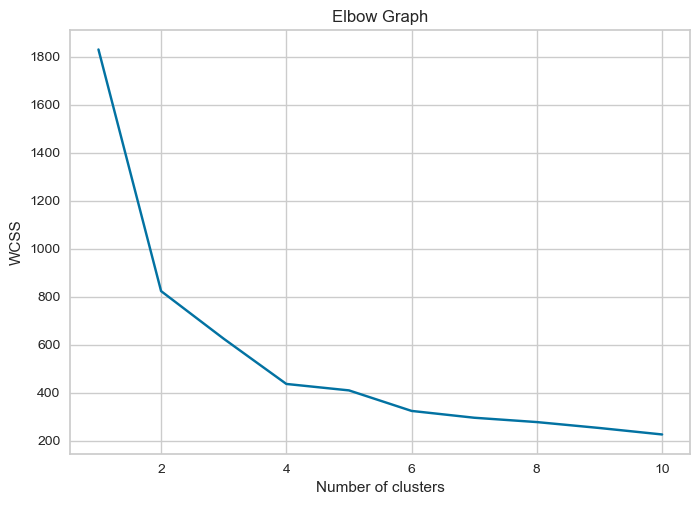

In [26]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
# Cluster algorithm using K=4
clusters4=KMeans(4,random_state=30).fit(norm_airline)
clusters4

KMeans(n_clusters=4, random_state=30)

In [28]:
clusters4.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [30]:
airline2=airline.copy()
airline2['clusters4id']=clusters4.labels_
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters4id
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,3


In [31]:
clusters4.cluster_centers_

array([[ 2.37681325e-02,  8.07125209e-03,  2.24748810e-02,
         8.98995241e-03,  1.05764146e-03,  1.25750315e-02,
         7.51540344e-02,  7.35667765e-03,  1.24322760e-02,
         4.34424062e-01,  8.32667268e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.92010150e-02,  7.21537510e-03,  6.40350877e-01,
         7.97448166e-04,  5.58213716e-03,  1.17843075e-01,
         2.00289307e-01,  7.30214826e-03,  1.19466763e-02,
         5.38787863e-01, -1.11022302e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00]])

In [32]:
airline2.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,40520.815442,89.978318,1.089900,1.017980,1.004231,3315.847171,6.463247,226.710735,0.658911,3605.113168,0.0
1,1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
2,2,117976.519936,80.437002,3.561404,1.001595,1.022329,31073.451356,17.224880,225.030303,0.633174,4470.706539,0.0
3,3,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0


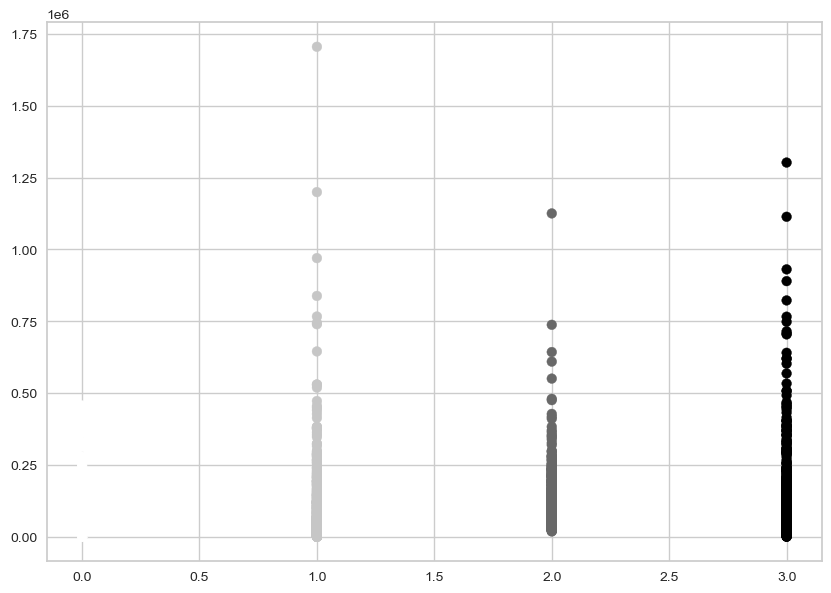

In [33]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline2['clusters4id'],airline2['Balance'], c=clusters4.labels_) 

In [34]:
clusters5=KMeans(5,random_state=30).fit(norm_airline)
clusters5

KMeans(n_clusters=5, random_state=30)

In [35]:
clusters5.labels_

array([4, 4, 4, ..., 3, 0, 0])

In [36]:
airline3=airline.copy()
airline3['clusters5id']=clusters5.labels_
airline3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters5id
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,4
2,19244,0,1,1,1,215,2,0,0,6968,0,4
3,41354,0,1,1,1,4123,4,0,0,7034,0,4
4,14776,0,1,1,1,500,1,0,0,6952,0,4
5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,3


In [37]:
clusters5.cluster_centers_

array([[ 1.94103660e-02,  8.43565288e-03,  1.76669894e-02,
         8.22846079e-03,  1.69409487e-03,  1.23106384e-02,
         7.18386276e-02,  6.90024091e-03,  1.13792033e-02,
         2.40189960e-01, -3.88578059e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -3.33066907e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 2.92977490e-02,  8.07381776e-03,  3.05651672e-02,
         9.80392157e-03,  2.88350634e-04,  1.31422452e-02,
  

In [38]:
airline3.groupby('clusters5id').agg(['mean']).reset_index()

,clusters5id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
1,1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
2,2,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0
3,3,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
4,4,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0


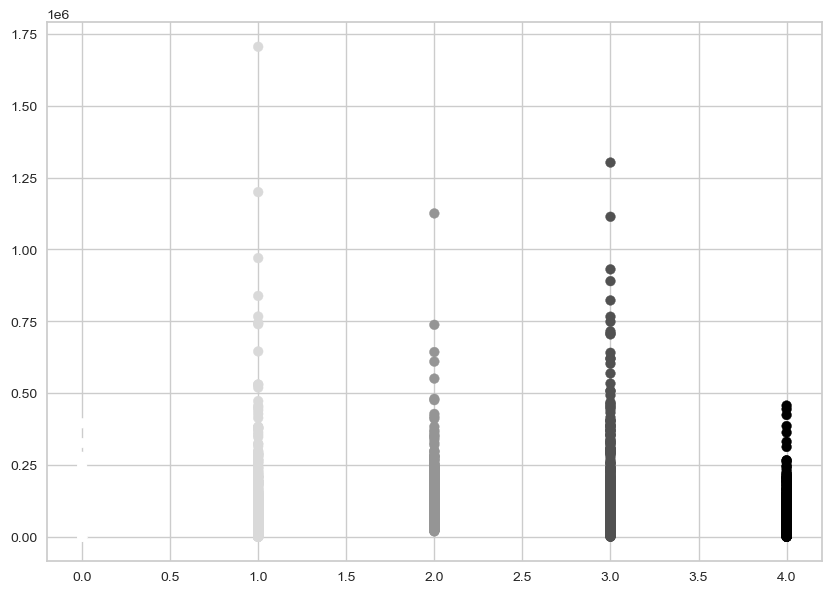

In [40]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline3['clusters5id'],airline3['Balance'], c=clusters5.labels_) 